In [1]:
%load_ext autoreload
%autoreload 2
%aimport helper_blending
%aimport blending
import cv2
import matplotlib.pyplot as plt
import numpy as np
import helper_blending
import blending

['isla.jpg', 'arco.jpg', [-50, 275], 'none', 'none', 'mixed']
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


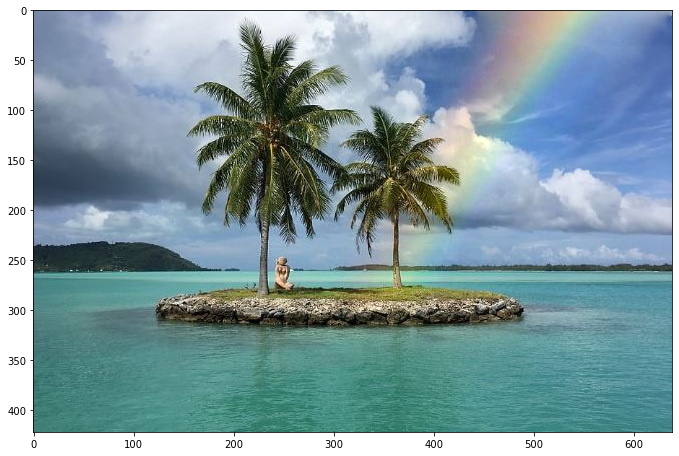

In [12]:
PATH = "D:/Maestria/CodigoMilton/uni_03_epi/images/"
'''
fushions = [
     
    ["paisaje.jpg","jet.jpg",[25,120], "none","none", "naive"],
    ["shrek.jpg", "trump.jpg",[-40,30], "none","none", "naive"],
    ["esqui.jpg","shrek.jpg",[2004,10], "none","naive", "naive"],
    ["esqui.jpg","penguin.jpg",[2300,1140], "naive","none", "naive"]
]
'''
fushions = [
     
    ["isla.jpg","arco.jpg",[-50,275], "none","none", "mixed"],
    #["desierto.jpg","brownbear.jpg",[175,346], "none","none", "poisson"],
    #["duck.jpg","bear.jpg",[0,0], "none","none", "poisson"],
    #["paisaje.jpg","jet.jpg",[25,120], "none","none", "mixed"],
    #["shrek.jpg", "trump.jpg",[-40,30], "none","none", "poisson"],
    #["esqui.jpg","shrek.jpg",[2004,10], "none","poisson", "mixed"],
    #["esqui.jpg","penguin.jpg",[2300,1140], "mixed","none", "mixed"]
]

for ble in fushions:
    print(ble)
    img_one = cv2.cvtColor(cv2.imread(PATH + (ble[3] +"_" if ble[3] != "none" else "") + ble[0],1), cv2.COLOR_BGR2RGB)
    img_two = cv2.cvtColor(cv2.imread(PATH + (ble[4] + "_" if ble[4] != "none" else "") + ble[1],1), cv2.COLOR_BGR2RGB)
    img_two_mask = cv2.cvtColor(cv2.imread(PATH + "mask_"+ble[1],1), cv2.COLOR_BGR2RGB)

    img_one = cv2.normalize(img_one.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)
    img_two = cv2.normalize(img_two.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)
    img_two_mask = cv2.normalize(img_two_mask.astype('float'), None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX)

    #Mixed Blend
    img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix = helper.dim_fix(img_two, img_two_mask, img_one, ble[2])
    if ble[5] == "naive":
        naive_img, img_one_blend = blending.naive_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix)
    elif ble[5] == "poisson":
        img_one_blend = blending.blend_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix, False)
    else:
        img_one_blend = blending.blend_image(img_two_fix, img_two_mask_fix, img_one_fix, img_two_dim_fix, True)
    

    helper.display_image(img_one_blend, True)

    # plot results
    img_one_blend = np.clip(img_one_blend,0.0,1.0)

    # save image
    img_one_blend = img_one_blend * 255
    img_one_blend = img_one_blend.astype(np.uint8)
    if ble[5] == "naive":
        cv2.imwrite(PATH +"naive_"+ble[0], cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))
    elif ble[5] == "poisson":
        cv2.imwrite(PATH +"poisson_"+ble[0], cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))
    else:
        cv2.imwrite(PATH +"mixed_"+ble[0], cv2.cvtColor(img_one_blend, cv2.COLOR_RGB2BGR))

